In [1]:
# comments and details to come !
import numpy as np
import scipy as sp
import scipy.ndimage
from scipy.stats import vonmises
import os
from IPython.display import display, clear_output, HTML
import sys
from toolbox import *

import matplotlib.pyplot as plt
from matplotlib import animation, rc, offsetbox
animation.rcParams['animation.writer']='ffmpeg'
rc('animation', html='html5')

%matplotlib inline

In [13]:
n = 256
lx=np.concatenate((np.linspace(0,n/2-1,n//2),np.linspace(-n/2,-1,n//2)))
x,y=np.meshgrid(lx,lx)
r=np.sqrt(x**2+y**2)
th = np.arctan2(y,x)

sig = 0.5
mu = 2.5
    
cov = np.sqrt(np.exp(-(r-mu)**2/(2*sig**2)))*mask(th,90,180)
noise = np.fft.fft2(np.random.randn(n,n))

activity_map = np.fft.ifft2(cov*noise)

thmod = 0.0
alpha = 1.0/(0.5*(activity_map.real.max()-activity_map.real.min()))
stock_im = np.zeros((n,n,3))
stock_im[:,:,0] = alpha*activity_map.real
stock_im[:,:,1] = alpha*activity_map.imag

map_th = 180.0/np.pi*np.angle( 1j*(np.pi*np.sin(thmod*np.pi/180.0)*\
                                  np.cos(thmod*np.pi/180.0)*activity_map.real+\
                                  np.pi/2.0*np.cos(2.0*thmod*np.pi/180.0)*activity_map.imag) +\
                                  -np.pi*np.sin(thmod*np.pi/180.0)*np.cos(thmod*np.pi/180.0)*\
                                  activity_map.imag+np.pi/2.0*np.cos(2.0*thmod*np.pi/180.0)\
                                  *activity_map.real)/2.0+90.0

stock_im[:,:,2] = map_th

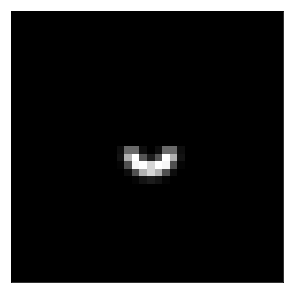

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5, 5));
ax.xaxis.set_visible(False);
ax.yaxis.set_visible(False);
ax.imshow(np.fft.fftshift(cov.real)[110:146,110:146], cmap='gray');

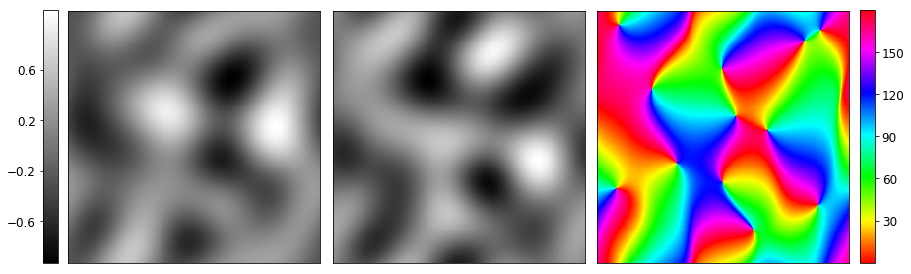

In [15]:
fig1, axes1 = plt.subplots(nrows=1, ncols=3,figsize=(14, 8))
fig1.subplots_adjust(wspace=0.05, hspace=0.1)

for k in range(3):
    plt.set_cmap('gray')
    if k==2:
        plt.set_cmap('hsv') 
    im0 = axes1[k].imshow(stock_im[:,:,k])
    if k==0:
        cax = fig1.add_axes([0.1, 0.285, 0.015, 0.438])
        cbar=fig1.colorbar(im0, cax=cax, ticks=np.arange(-1.0,1.0,0.4))
        cbar.ax.yaxis.set_ticks_position('left')
        cbar.ax.tick_params(labelsize=12)
    elif k==2:
        cax = fig1.add_axes([0.91, 0.285, 0.015, 0.438])
        cbar=fig1.colorbar(im0, cax=cax, ticks=np.arange(0,181,30))
        cbar.ax.tick_params(labelsize=12)

    axes1[k].xaxis.set_visible(False)
    axes1[k].yaxis.set_visible(False)

In [16]:
# First set up the figure, the axis, and the plot element we want to animate

fig01, axes01 = plt.subplots(nrows=1, ncols=1,figsize=(7, 5));
time_template = r'$\theta$ = %.1f$^o$'
time_text = axes01.text(0.0, 1.02, '', fontsize=20, transform=axes01.transAxes);
plt.close()

theta = 0
act_map = np.real( alpha*activity_map * np.exp(-2.0*1j*np.pi*theta/180.0) )

im0 = axes01.imshow(act_map, vmin=-1.0, vmax=1.0, cmap='gray'); 
cax0 = fig01.add_axes([0.82, 0.126, 0.04, 0.76], label='ax0');
cbar0 = fig01.colorbar(im0, cax=cax0, ticks=np.arange(-1.0,1.1,0.4)); 
cbar0.ax.tick_params(labelsize=15);
axes01.xaxis.set_visible(False);
axes01.yaxis.set_visible(False);

# animation function. This is called sequentially
def animate(i): 
    theta = 2.5*(i+1)
    act_map = np.real( alpha*activity_map * np.exp(-2.0*1j*np.pi*theta/180.0) )
    
    im0.set_data(act_map)  
    time_text.set_text(time_template % (theta));
     
    return im0
            
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig01, animate, frames=4*18, interval=100);
HTML(anim.to_html5_video())